Importing important libraries

In [1]:
import numpy as np
import scipy as sp
from scipy import signal
import pandas as pd

%matplotlib inline

import matplotlib
import matplotlib.pyplot as plt

Import data through pandas 

In [2]:
path = "./temp_data/"
file_name = path + "imuWed_Feb_14_setup2.csv" #"Right_to_left_paralle_to_earth.csv"
data_file = pd.read_csv(file_name, sep=',',header=0);

In [3]:
data_file.head()

,timestamp,orientation_x,orientation_y,orientation_z,orientation_w,AccX,AccY,AccZ,GyroX,GyroY,...,arm_synched,device_direction,warmupState,synced,battery_level,rssi,bluetooth_strength,player_hand,swing_type,stroke_type
0,1518638410850,-0.112122,-0.229004,-0.477966,0.840576,0.397949,0.202148,0.726562,-13.6250,20.1250,...,False,NaN,NaN,NaN,-1,0,0,right_handed,topspin,forehand
1,1518638410860,-0.113892,-0.227661,-0.479980,0.839539,0.490234,0.119141,0.673340,-21.6875,8.4375,...,False,NaN,NaN,NaN,-1,0,0,right_handed,topspin,forehand
2,1518638410875,-0.119385,-0.223694,-0.481934,0.838684,0.544922,-0.126953,0.754883,-31.7500,11.5000,...,False,NaN,NaN,NaN,-1,0,0,right_handed,topspin,forehand
3,1518638410899,-0.119263,-0.219421,-0.484497,0.838379,0.432617,-0.065430,0.811035,-10.1875,21.1250,...,False,NaN,NaN,NaN,-1,0,0,right_handed,topspin,forehand
4,1518638410920,-0.117676,-0.214355,-0.488403,0.837646,0.340820,0.114258,0.862305,-18.0625,22.8750,...,False,NaN,NaN,NaN,-1,0,0,right_handed,topspin,forehand


In [36]:
time = data_file['timestamp'];
gyr = data_file[['GyroX', 'GyroY', 'GyroZ']];
acc = data_file[['AccX', 'AccY', 'AccZ']] ;
quaternion = data_file[['orientation_w', 'orientation_x', 'orientation_y', 'orientation_z']]
print acc

          AccX      AccY      AccZ
0     0.397949  0.202148  0.726562
1     0.490234  0.119141  0.673340
2     0.544922 -0.126953  0.754883
3     0.432617 -0.065430  0.811035
4     0.340820  0.114258  0.862305
5     0.363281  0.120605  0.925293
6     0.417480 -0.023438  0.943359
7     0.422852 -0.095215  0.934082
8     0.401367 -0.081543  0.865234
9     0.443359 -0.115234  0.863281
10    0.429688 -0.128418  0.861328
11    0.462891 -0.094727  0.885742
12    0.455078 -0.106934  0.930664
13    0.476562 -0.140137  0.911621
14    0.532227 -0.169922  0.876465
15    0.576660 -0.216797  0.919434
16    0.609863 -0.228516  0.907715
17    0.632812 -0.238770  0.858398
18    0.683105 -0.278809  0.856934
19    0.725098 -0.326172  0.922852
20    0.701660 -0.336914  1.015137
21    0.712891 -0.291504  1.066895
22    0.735352 -0.266602  1.104980
23    0.686035 -0.270996  1.093750
24    0.583984 -0.201660  1.159180
25    0.547363 -0.239258  1.200195
26    0.554199 -0.277832  1.184570
27    0.597168 -0.33

In [37]:
##Find magnitude of accelerometer(x,y,z) = sqrt(x*x +y*y+ z*z)

acc_mag= np.sqrt(np.square(acc).sum(axis=1))
#acc_mag = np.linalg.norm(acc, axis = 0)
"""0.15836358070373535
0.040863990783691406
0.52789306640625"""

0       0.852714
1       0.841374
2       0.939630
3       0.921530
4       0.934228
5       1.001342
6       1.031875
7       1.029747
8       0.957275
9       0.977293
10      0.971086
11      1.003883
12      1.041473
13      1.038173
14      1.039389
15      1.106750
16      1.117183
17      1.092845
18      1.130797
19      1.218117
20      1.279195
21      1.315846
22      1.353809
23      1.319232
24      1.313546
25      1.340642
26      1.336987
27      1.345888
28      1.406060
29      1.522810
          ...   
2356    1.121740
2357    1.128016
2358    1.125560
2359    1.090555
2360    1.055007
2361    1.037591
2362    1.026662
2363    1.024271
2364    1.025530
2365    1.030335
2366    1.021132
2367    1.006630
2368    0.982370
2369    0.981361
2370    0.969570
2371    0.959081
2372    0.950977
2373    0.951253
2374    0.954006
2375    0.969035
2376    1.003191
2377    1.036145
2378    1.066636
2379    1.066727
2380    1.046299
2381    1.058231
2382    1.058652
2383    1.0660

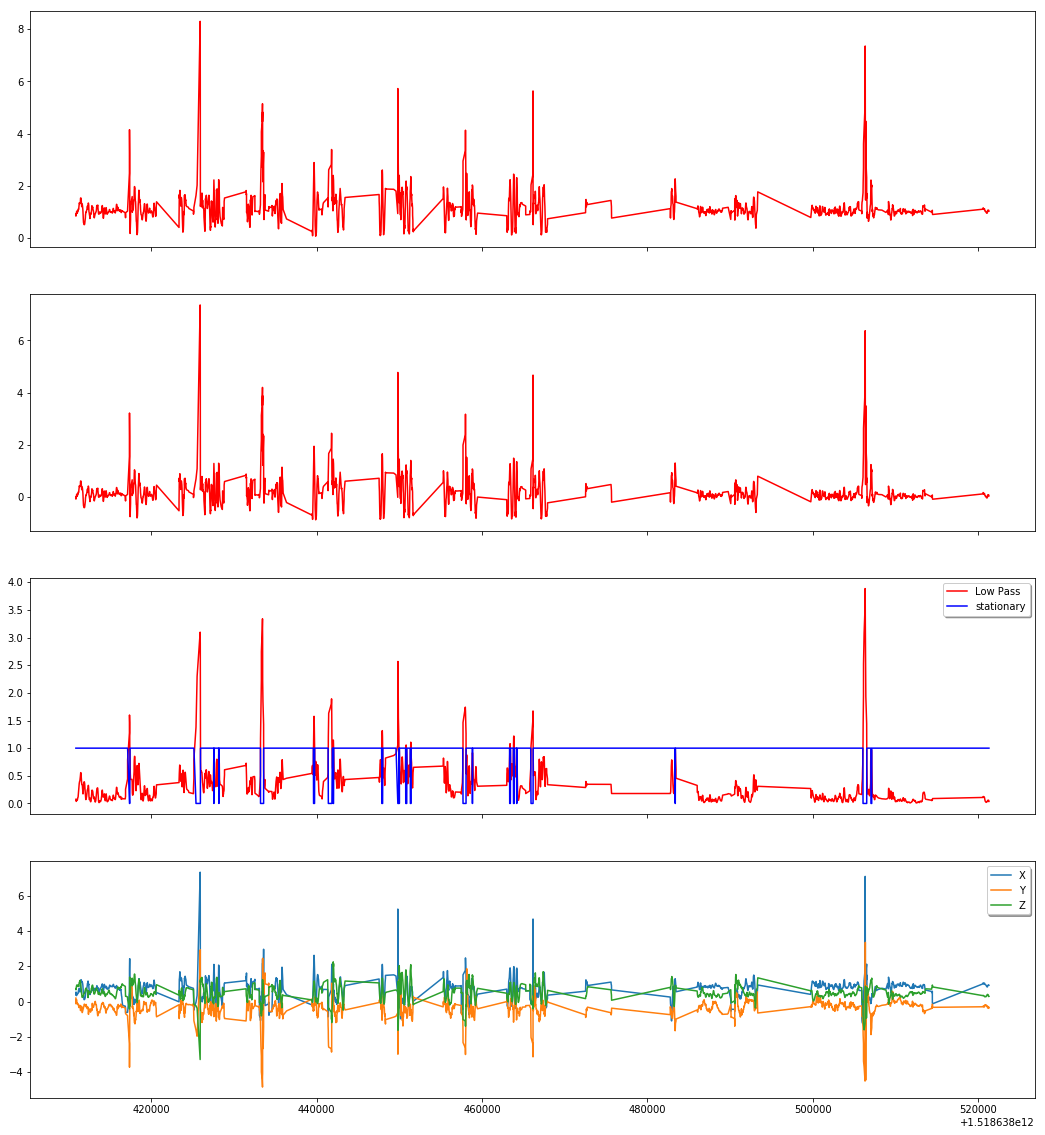

In [43]:

### this can help us detect the stroke itself.
## need to meet a professor from Electrical Department, who can help us understand this part

#HP filter accelerometer data

filtCutOff = .001;
sampleFrequecy = 50;
number_of_pass = 1

b, a =  signal.butter(number_of_pass, (2*filtCutOff) / sampleFrequecy, 'high', analog=False)
acc_magFilt = signal.filtfilt(b, a, acc_mag)

f, (ax4, ax1, ax2, ax3) = plt.subplots(4, sharex=True, figsize=(18,20))
ax4.plot(time, acc_mag, 'r', label="Magnitude");

ax1.plot(time, acc_magFilt, 'r', label="High Pass");

# Compute absolute value
acc_magFilt = np.absolute(acc_magFilt);

# LP filter accelerometer data
filtCutOff = 5.0;
b, a = signal.butter(number_of_pass, (2*(filtCutOff)/ (sampleFrequecy)), 'low')
acc_magFilt = signal.filtfilt(b, a, acc_magFilt)


stationary = acc_magFilt < .9;

ax2.plot(time, acc_magFilt, 'r', label="Low Pass");
ax2.plot(time, stationary, 'b', label="stationary");

#stationary = acc_magFilt < 0.5; ### this can help us detect the 
ax2.legend(shadow=True, fancybox=True, loc="upper right");


ax3.plot(time, acc,);

ax3.legend(['X','Y','Z'],shadow=True, fancybox=True, loc="upper right");



 ### this can help us detect the 





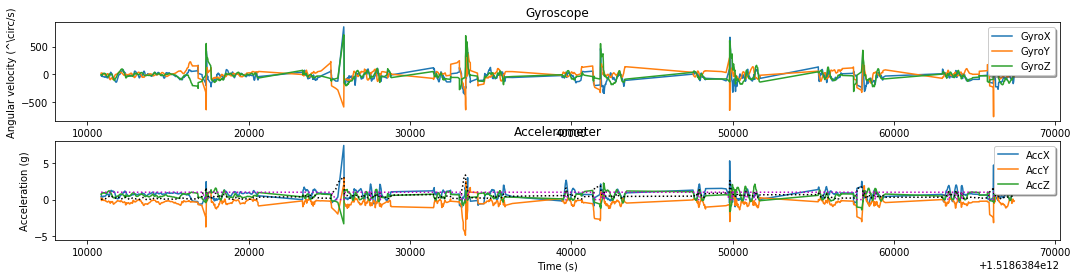

In [46]:
plt.figure('Position', figsize=(18,4));
plt.subplot(211);
plt.plot(time[:-1000], gyr[:-1000]);
plt.title('Gyroscope');
plt.xlabel('Time (s)');
plt.ylabel('Angular velocity (^\circ/s)');
plt.legend(list(gyr),shadow=True, fancybox=True, loc="upper right");
plt.subplot(212);
plt.plot(time[:-1000], acc[:-1000]);
plt.plot(time[:-1000], acc_magFilt[:-1000], ':k');
plt.plot(time[:-1000], stationary[:-1000], ':m');
#plt.plot(time, stationary, 'k', 'LineWidth', 2);
plt.title('Accelerometer');
plt.xlabel('Time (s)');
plt.ylabel('Acceleration (g)');
plt.legend(list(acc), shadow=True, fancybox=True, loc="upper right");


In [8]:
# Convert acceleration measurements to m/s/s
'''quaternion
# Plot translational accelerations
plt.figure('Accelerations');
plt.plot(time[1:100], acc['orientation_x'][1:100], 'r');
plt.plot(time[1:100], acc['orientation_y'][1:100], 'g');
plt.plot(time[1:100], acc['orientation_z'][1:100], 'b');
plt.title('Acceleration');
plt.xlabel('Time (s)');
plt.ylabel('Acceleration (m/s/s)');
plt.legend(shadow=True, fancybox=True, loc="upper right");'''

'quaternion\n# Plot translational accelerations\nplt.figure(\'Accelerations\');\nplt.plot(time[1:100], acc[\'orientation_x\'][1:100], \'r\');\nplt.plot(time[1:100], acc[\'orientation_y\'][1:100], \'g\');\nplt.plot(time[1:100], acc[\'orientation_z\'][1:100], \'b\');\nplt.title(\'Acceleration\');\nplt.xlabel(\'Time (s)\');\nplt.ylabel(\'Acceleration (m/s/s)\');\nplt.legend(shadow=True, fancybox=True, loc="upper right");'

In [9]:
def quaternProd(a, b):
    ab = np.zeros(a.shape);
    ab[:,0] = a[:,0]*b[:,0] - a[:,1]*b[:,1] - a[:,2]*b[:,2] - a[:,3]*b[:,3];
    ab[:,1] = a[:,0]*b[:,1] + a[:,1]*b[:,0] + a[:,2]*b[:,3] - a[:,3]*b[:,2];
    ab[:,2] = a[:,0]*b[:,2] - a[:,1]*b[:,3] + a[:,2]*b[:,0] + a[:,3]*b[:,1];
    ab[:,3] = a[:,0]*b[:,3] + a[:,1]*b[:,2] - a[:,2]*b[:,1] + a[:,3]*b[:,0];
    return ab;

def quaternConj(q):
    ab = np.zeros(q.shape);
    ab[:,0] = q[:,0]
    ab[:,1] = -q[:,1]
    ab[:,2] = -q[:,2]
    ab[:,3] = -q[:,3]
    return ab

def quaternRotate(v, q):
    (row, col) = v.shape;
    acc = np.append(np.zeros((row,1)), v, 1)
    #print acc[1:5]
    v0XYZ = quaternProd(quaternProd(q, acc), quaternConj(q));
    return v0XYZ[:, 1:4];

In [48]:
#Compute translational accelerations

accelerometer = acc.copy()
quat = quaternion.as_matrix()

##Rotate body accelerations to Earth frame
acc = quaternRotate( accelerometer, quaternConj(quat));

#Convert acceleration measurements to m/s/s
#acc = acc * 9.81;




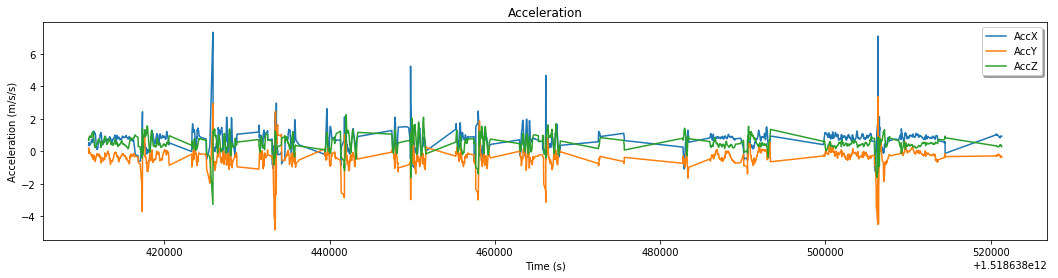

In [50]:
plt.figure('Accelerations', figsize= (18,4));
plt.plot(time, accelerometer, );
plt.title('Acceleration');
plt.xlabel('Time (s)');
plt.ylabel('Acceleration (m/s/s)');
plt.legend(list(accelerometer), shadow=True, fancybox=True, loc="upper right");

In [24]:
stationary_diff = np.diff(stationary)

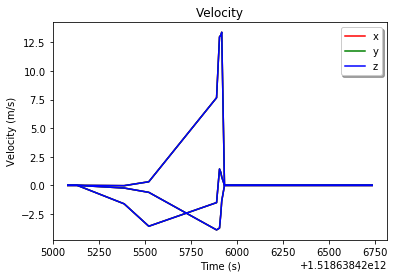

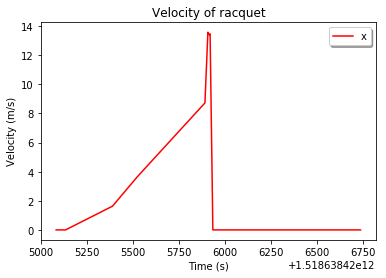

In [56]:
#removing earth's gravity(default ) from z axis

#acc[:,2] = acc[:,2] 9.81;
#samplePeriod = 50;

#Integrate acceleration to yield velocity
vel = np.zeros(accelerometer.shape);
for t in range(1,len(vel)):
    vel[t,:] = vel[t - 1,:] + accelerometer.iloc[t]# * samplePeriod;
    if(stationary[t] == 1):
        vel[t,:] = [0, 0, 0];     # force zero velocity when foot stationary
    
velDrift = np.zeros(vel.shape);



'''stationaryStart = find([0; diff(stationary)] == -1);
stationaryEnd = find([0; diff(stationary)] == 1);
for i = 1:numel(stationaryEnd)
    driftRate = vel(stationaryEnd(i)-1, :) / (stationaryEnd(i) - stationaryStart(i));
    enum = 1:(stationaryEnd(i) - stationaryStart(i));
    drift = [enum'*driftRate(1) enum'*driftRate(2) enum'*driftRate(3)];
    velDrift(stationaryStart(i):stationaryEnd(i)-1, :) = drift;
end'''
    

             
plt.figure('Velocity');
plt.plot(time[500:550], vel[500:550], 'r', label="x");
plt.plot(time[500:550], vel[500:550], 'g', label="y");
plt.plot(time[500:550], vel[500:550], 'b', label="z");
plt.title('Velocity');
plt.xlabel('Time (s)');
plt.ylabel('Velocity (m/s)');
plt.legend(shadow=True, fancybox=True, loc="upper right");

velocity_norm =  np.linalg.norm(vel, axis=1)


plt.figure('Velocity max');
plt.plot(time[500:550], (velocity_norm[500:550]), 'r', label="x");
plt.title('Velocity of racquet');
plt.xlabel('Time (s)');
plt.ylabel('Velocity (m/s)');
plt.legend(shadow=True, fancybox=True, loc="upper right");


In [14]:
print stationary_diff

[False False False ... False False False]


In [15]:
#print velocity_resultant

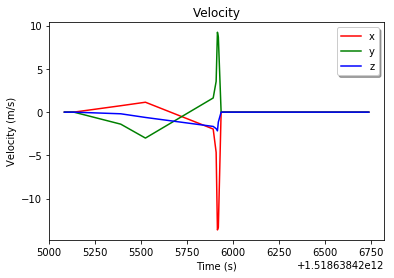

In [16]:
stationary_diff = np.diff(stationary+0)
stationaryStart = np.where(stationary_diff == -1)[0]
stationaryEnd = np.where(stationary_diff == 1)[0]
velDrift = np.zeros(vel.shape);
for i in range(0, len(stationaryEnd)):
    rateDiff = (stationaryEnd[i] - stationaryStart[i])
    driftRate = np.divide(vel[stationaryEnd[i] - 1, :], rateDiff)
    enum = np.arange(0, (stationaryEnd[i] - stationaryStart[i])-1);
    enum = np.array([enum, enum, enum])
    drift = enum.T * driftRate
    velDrift[stationaryStart[i]:stationaryEnd[i]-1, :] = drift;

vel = vel - velDrift;             
plt.figure('Velocity');
plt.plot(time[500:550], vel[500:550,0], 'r', label="x");
plt.plot(time[500:550], vel[500:550,1], 'g', label="y");
plt.plot(time[500:550], vel[500:550,2], 'b', label="z");
plt.title('Velocity');
plt.xlabel('Time (s)');
plt.ylabel('Velocity (m/s)');
plt.legend(shadow=True, fancybox=True, loc="upper right");

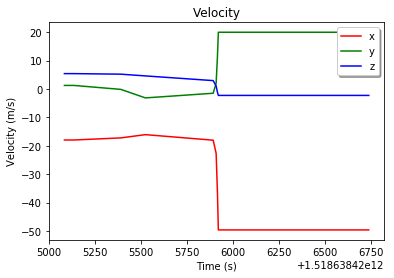

In [17]:
# Compute translational position
# Integrate velocity to yield position


pos = np.zeros(vel.shape);
for t in range(2, len(pos)):
    pos[t] = pos[t-1] + vel[t];    # integrate velocity to yield position
            
plt.figure('Position');
plt.plot(time[500:550], pos[500:550,0], 'r', label="x");
plt.plot(time[500:550], pos[500:550,1], 'g', label="y");
plt.plot(time[500:550], pos[500:550,2], 'b', label="z");
plt.title('Velocity');
plt.xlabel('Time (s)');
plt.ylabel('Velocity (m/s)');
plt.legend(shadow=True, fancybox=True, loc="upper right");

In [18]:
enum = np.arange(0, (stationaryEnd[0] - stationaryStart[0]));

In [19]:
print enum

[0 1 2 3]
